In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("tourist_review_emotion_classification.xlsx")
df.head()

,Category,text,title,rating,travelDate,publishedDate,placeInfo/addressObj/city,placeInfo/address,placeInfo/locationString,placeInfo/addressObj/postalcode,...,Region,VADER,Cardiff,Hartmann,GoEmotions,XLM-R,ABSA,Flan-T5,FinalDecision,ReviewSentiment
0,Activities,Water was great temperature refreshing but not...,Crystal clear and not too cold,5,2025-07,2025-07-11,Darwin,"Berry Springs Nature Reserve, Darwin, Northern...","Darwin, Top End, Northern Territory",837,...,Darwin,0.6213,"('positive', 0.978)","('neutral', 0.686)","('amusement', 0.148)","('positive', 0.739)","[{'aspect': 'Water', 'sentiment': 'Positive', ...",positive,Positive1,Positive
1,Activities,Amazing experience! Water colour was spectacul...,Amazing water colour,5,2025-07,2025-07-06,Darwin,"Berry Springs Nature Reserve, Darwin, Northern...","Darwin, Top End, Northern Territory",837,...,Darwin,0.9112,"('positive', 0.988)","('joy', 0.735)","('excitement', 0.154)","('positive', 0.84)","[{'aspect': 'Water colour', 'sentiment': 'Posi...",positive,Positive1,Positive
2,Activities,Lovely warm water...very deep...has a beautifu...,Warm clear water for swimming,5,2025-07,2025-07-05,Darwin,"Berry Springs Nature Reserve, Darwin, Northern...","Darwin, Top End, Northern Territory",837,...,Darwin,0.8834,"('positive', 0.981)","('joy', 0.788)","('caring', 0.138)","('positive', 0.81)","[{'aspect': 'water', 'sentiment': 'Positive', ...",positive,Positive1,Positive
3,Activities,Three in attendance from Victoria including a ...,Chill time from Victoria,4,2025-07,2025-07-02,Darwin,"Berry Springs Nature Reserve, Darwin, Northern...","Darwin, Top End, Northern Territory",837,...,Darwin,0.9387,"('positive', 0.512)","('fear', 0.884)","('surprise', 0.26)","('positive', 0.921)","[{'aspect': 'None', 'sentiment': 'Neutral', 'c...",positive,Positive1,Positive
4,Activities,Was really nice and warm and wasn’t to\nCold q...,Great swimming spot,5,2025-06,2025-06-16,Darwin,"Berry Springs Nature Reserve, Darwin, Northern...","Darwin, Top End, Northern Territory",837,...,Darwin,0.9603,"('positive', 0.975)","('joy', 0.77)","('caring', 0.172)","('positive', 0.896)","[{'aspect': 'nice bbq', 'sentiment': 'Positive...",positive,Positive1,Positive


C:\Users\trinh\AppData\Local\Temp\ipykernel_27248\2189632620.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='Region', y='rating', palette='Blues_r')


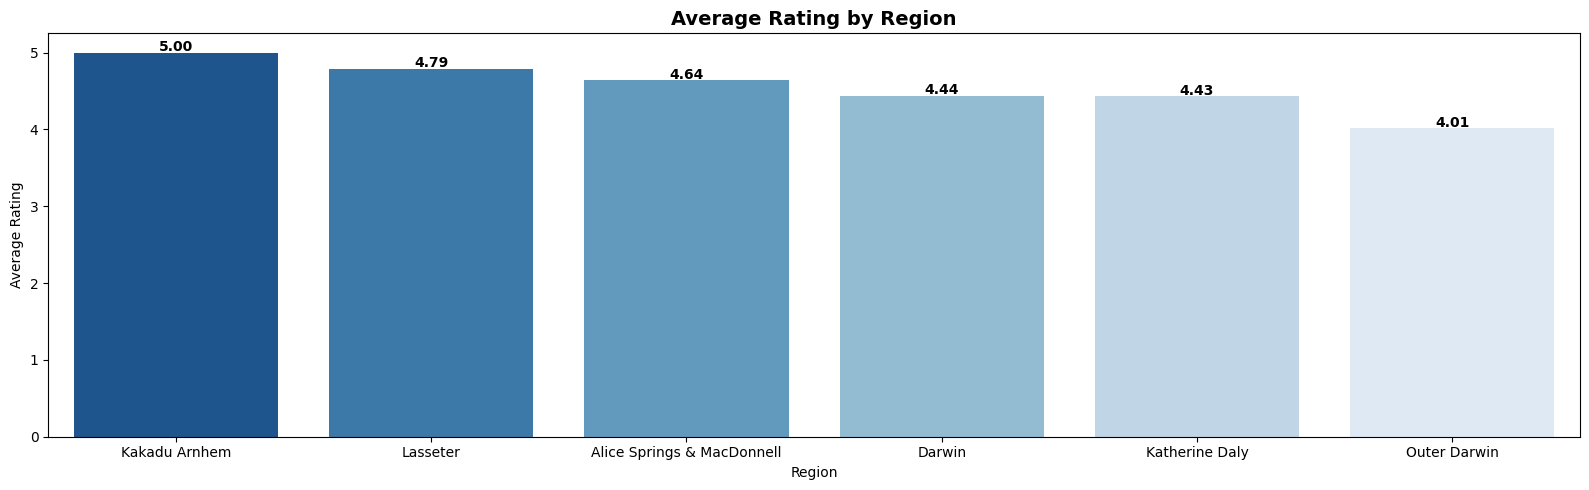

In [ ]:
# Distribution of sentiment by sector
import seaborn as sns
import matplotlib.pyplot as plt

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

avg_rating = df.groupby('Region')['rating'].mean().reset_index()

avg_rating = avg_rating.sort_values(by='rating', ascending=False)

plt.figure(figsize=(16, 5))
sns.barplot(data=avg_rating, x='Region', y='rating', palette='Blues_r')

plt.title("Average Rating by Region", fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Average Rating")

for i, v in enumerate(avg_rating['rating']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\trinh\AppData\Local\Temp\ipykernel_27248\2536657834.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positive_ratio, x='Region', y='Percent', palette='Greens_r')


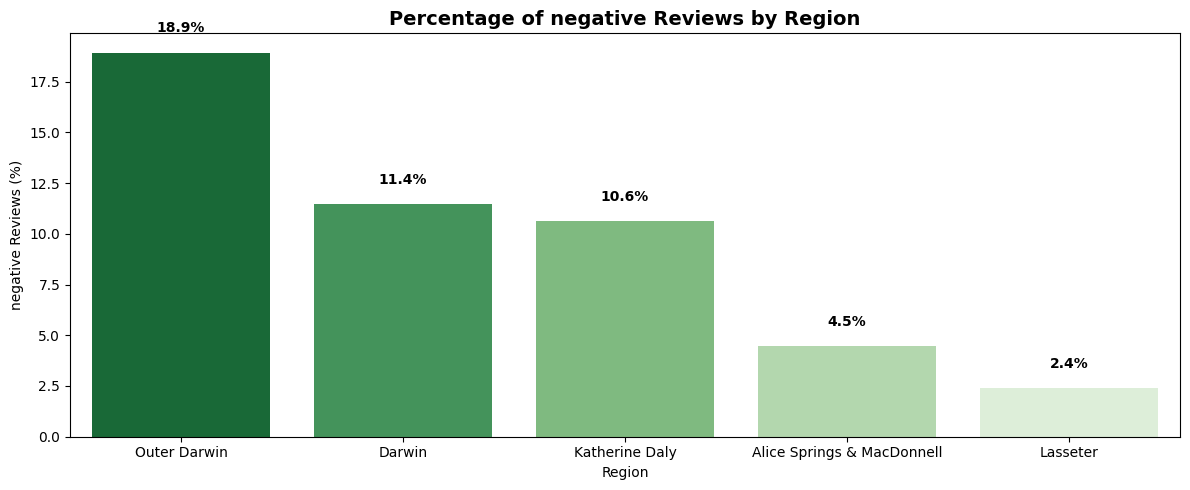

In [ ]:
# Percentage of negative Reviews by Region
df['ReviewSentiment'] = df['ReviewSentiment'].str.lower()

sentiment_counts = df.groupby(['Region', 'ReviewSentiment']).size().reset_index(name='Count')

region_total = df.groupby('Region').size().reset_index(name='Total')

sentiment_ratio = sentiment_counts.merge(region_total, on='Region')
sentiment_ratio['Percent'] = (sentiment_ratio['Count'] / sentiment_ratio['Total']) * 100

positive_ratio = sentiment_ratio[sentiment_ratio['ReviewSentiment'] == 'negative']

positive_ratio = positive_ratio.sort_values(by='Percent', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(data=positive_ratio, x='Region', y='Percent', palette='Greens_r')

plt.title("Percentage of negative Reviews by Region", fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("negative Reviews (%)")

for i, v in enumerate(positive_ratio['Percent']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

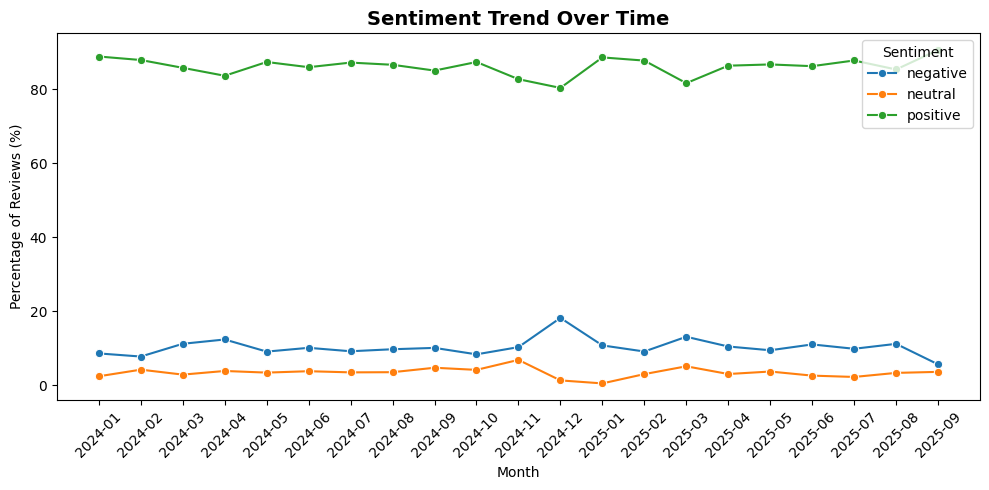

In [ ]:
# Sentiment Trend Over Time
df['ReviewSentiment'] = df['ReviewSentiment'].str.lower()

df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

df['YearMonth'] = df['publishedDate'].dt.to_period('M').astype(str)

sentiment_over_time = df.groupby(['YearMonth', 'ReviewSentiment']).size().reset_index(name='Count')

total_monthly = df.groupby('YearMonth').size().reset_index(name='Total')

sentiment_over_time = sentiment_over_time.merge(total_monthly, on='YearMonth')
sentiment_over_time['Percent'] = (sentiment_over_time['Count'] / sentiment_over_time['Total']) * 100

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=sentiment_over_time,
    x='YearMonth',
    y='Percent',
    hue='ReviewSentiment',
    marker='o'
)

plt.title("Sentiment Trend Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Percentage of Reviews (%)")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", loc='upper right')
plt.tight_layout()
plt.show()

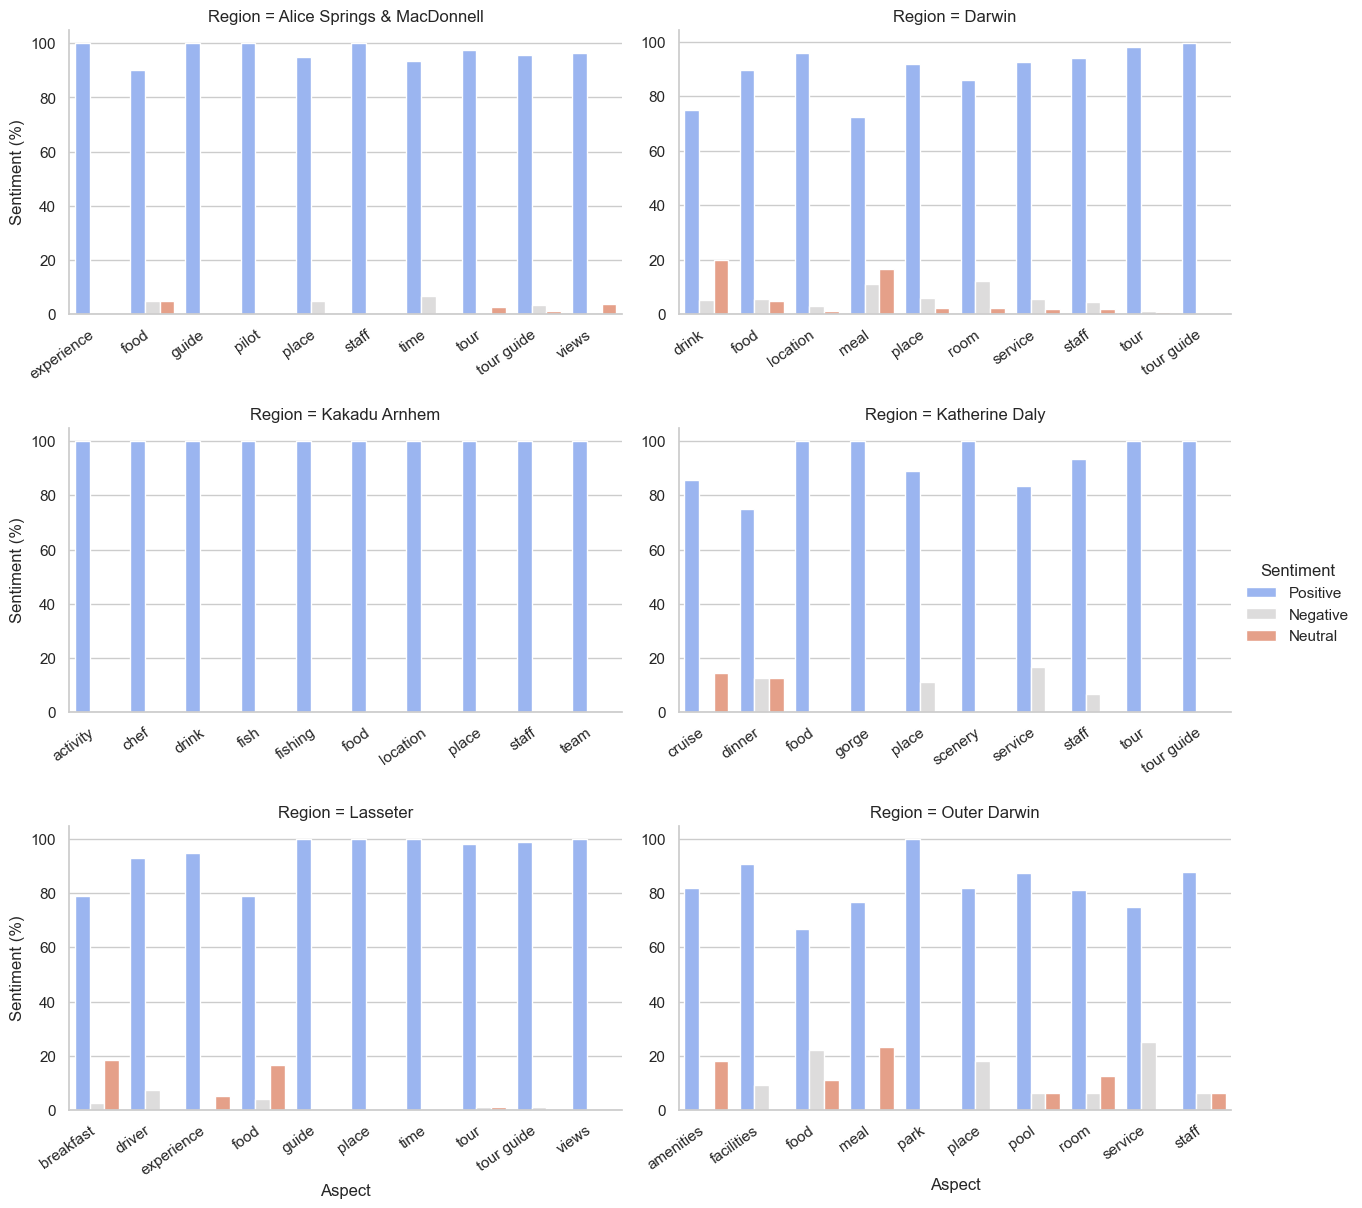

In [ ]:
# Text analysis
from wordcloud import WordCloud
from collections import Counter
import ast  

def parse_absa(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        else:
            return []
    except:
        return []

df['ABSA'] = df['ABSA'].apply(parse_absa)

# Region + Aspect + Sentiment
rows = []
for _, row in df.iterrows():
    region = row.get('Region', 'Unknown')
    for item in row['ABSA']:
        if isinstance(item, dict) and 'aspect' in item and 'sentiment' in item:
            aspect = str(item['aspect']).lower().strip()
            sentiment = str(item['sentiment']).capitalize().strip()
            if aspect and aspect != 'none':
                rows.append((region, aspect, sentiment))

aspect_reg_df = pd.DataFrame(rows, columns=['Region', 'Aspect', 'Sentiment'])

def normalize_aspect(aspect):
    aspect = aspect.lower().strip()
    replacements = {
        'rooms': 'room',
        'room.': 'room',
        'meals': 'meal',
        'drinks': 'drink',
        'tours': 'tour',
        'guides': 'guide',
        'foods': 'food',
        'staffs': 'staff',
        'services': 'service',
        'locations': 'location',
        'prices': 'price',
        'guide': 'tour guide',
        'centre': 'shopping centre'
    }
    return replacements.get(aspect, aspect)

aspect_reg_df['Aspect'] = aspect_reg_df['Aspect'].apply(normalize_aspect)

# Count aspect
top_aspects_per_reg = (
    aspect_reg_df.groupby(['Region', 'Aspect'])
    .size()
    .reset_index(name='Count')
)

top10_per_reg = (
    top_aspects_per_reg
    .sort_values(['Region', 'Count'], ascending=[True, False])
    .groupby('Region')
    .head(10)
)

# percentage
sent_summary = (
    aspect_reg_df.groupby(['Region', 'Aspect', 'Sentiment'])
    .size()
    .reset_index(name='Count')
)

sent_summary['Total'] = sent_summary.groupby(['Region', 'Aspect'])['Count'].transform('sum')
sent_summary['Percent'] = (sent_summary['Count'] / sent_summary['Total']) * 100

sent_summary = sent_summary.merge(
    top10_per_reg[['Region', 'Aspect']],
    on=['Region', 'Aspect'], how='inner'
)

sns.set(style="whitegrid")
g = sns.catplot(
    data=sent_summary,
    x="Aspect", y="Percent",
    hue="Sentiment", col="Region",
    kind="bar", col_wrap=2,    
    height=4.5, aspect=1.4,
    palette="coolwarm", sharex=False, sharey=False
)

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=35)
    for label in ax.get_xticklabels():
        label.set_ha("right")

g.set_titles("Region = {col_name}")
g.set_axis_labels("Aspect", "Sentiment (%)")
g.fig.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4)
plt.savefig("aspect_by_region_vertical.png", dpi=200, bbox_inches="tight")
plt.show()


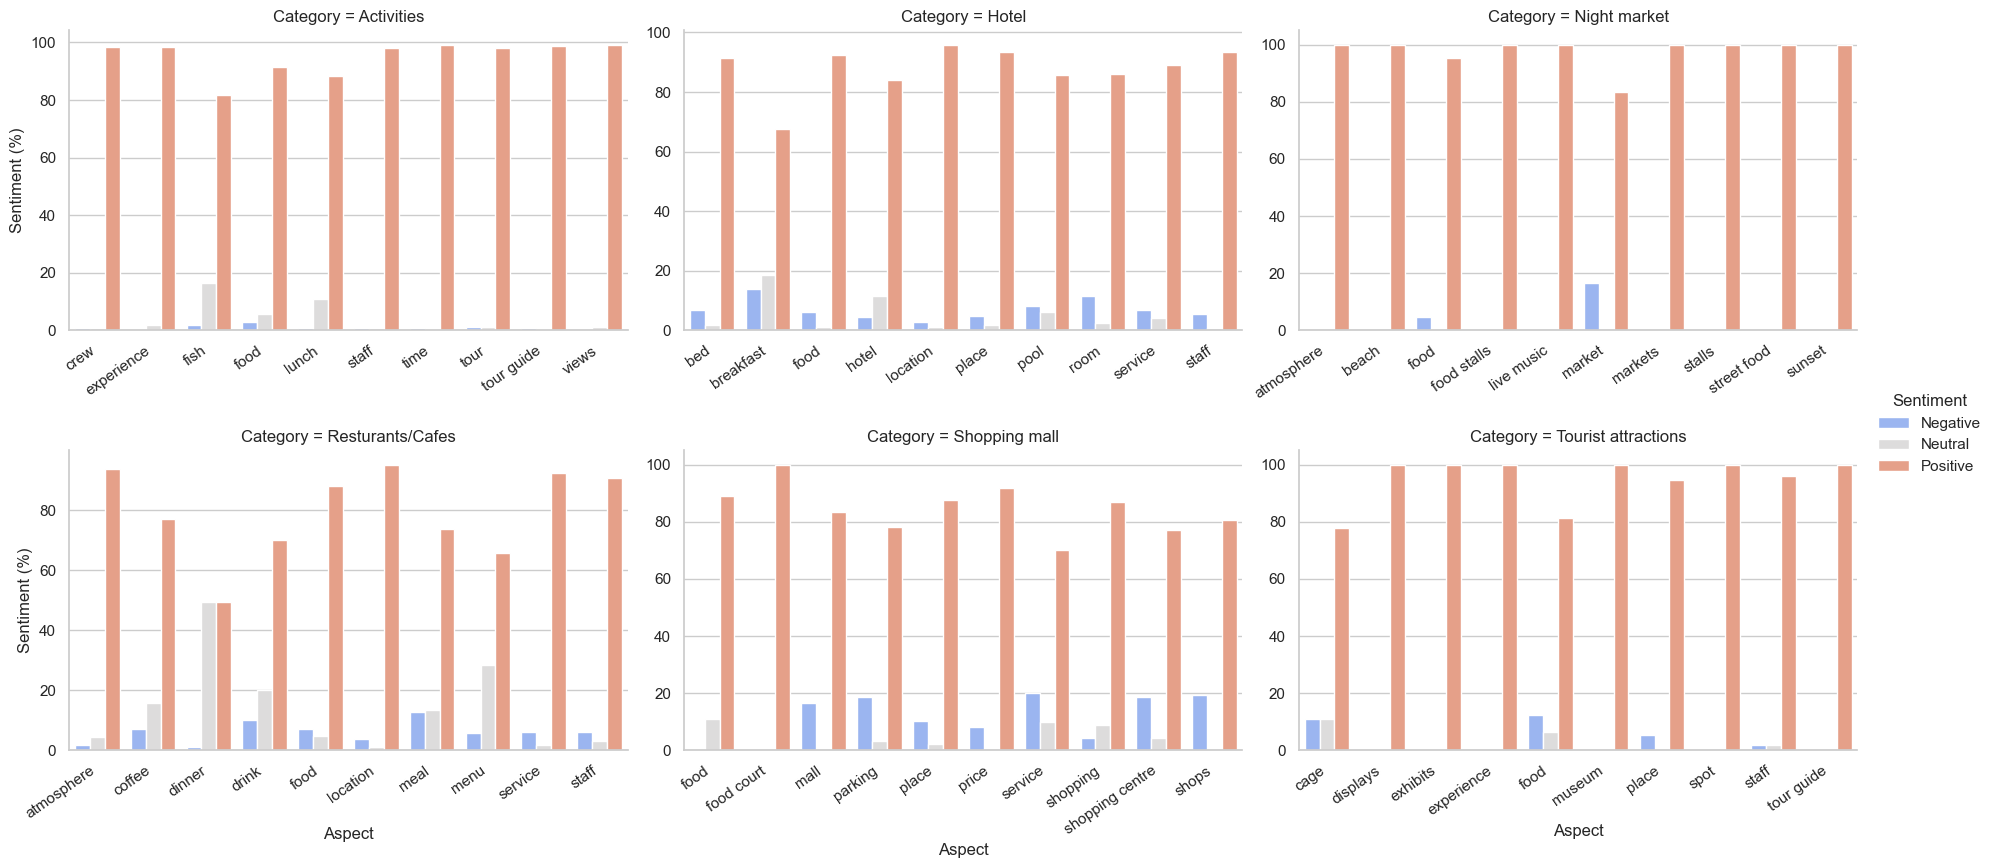

In [ ]:
# Top 10 words by Category
rows = []
for _, row in df.iterrows():
    category = row.get('Category', 'Unknown')
    for item in row['ABSA']:
        if isinstance(item, dict) and 'aspect' in item and 'sentiment' in item:
            aspect = item['aspect'].lower().strip()
            sentiment = item['sentiment'].capitalize().strip()
            if aspect != 'none':
                rows.append((category, aspect, sentiment))

aspect_cat_df = pd.DataFrame(rows, columns=['Category', 'Aspect', 'Sentiment'])

def normalize_aspect(aspect):
    aspect = aspect.lower().strip()
    replacements = {
        'rooms': 'room',
        'room.': 'room',
        'meals': 'meal',
        'drinks': 'drink',
        'tours': 'tour',
        'guides': 'guide',
        'foods': 'food',
        'staffs': 'staff',
        'services': 'service',
        'locations': 'location',
        'prices': 'price',
        'guide': 'tour guide',
        'centre': 'shopping centre'
    }
    return replacements.get(aspect, aspect)

aspect_cat_df['Aspect'] = aspect_cat_df['Aspect'].apply(normalize_aspect)

top_aspects_per_cat = (
    aspect_cat_df.groupby(['Category', 'Aspect'])
    .size()
    .reset_index(name='Count')
)

top10_per_cat = (
    top_aspects_per_cat
    .sort_values(['Category', 'Count'], ascending=[True, False])
    .groupby('Category')
    .head(10)
)

sent_summary = (
    aspect_cat_df.groupby(['Category', 'Aspect', 'Sentiment'])
    .size()
    .reset_index(name='Count')
)

sent_summary['Total'] = sent_summary.groupby(['Category', 'Aspect'])['Count'].transform('sum')
sent_summary['Percent'] = (sent_summary['Count'] / sent_summary['Total']) * 100

sent_summary = sent_summary.merge(top10_per_cat[['Category', 'Aspect']], on=['Category', 'Aspect'], how='inner')

sns.set(style="whitegrid")
g = sns.catplot(
    data=sent_summary,
    x="Aspect", y="Percent",
    hue="Sentiment", col="Category",
    kind="bar", col_wrap=3,
    height=4.5, aspect=1.4,
    palette="coolwarm", sharex=False, sharey=False
)

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=35)
    for label in ax.get_xticklabels():
        label.set_ha("right")

g.set_titles("Category = {col_name}")
g.set_axis_labels("Aspect", "Sentiment (%)")
g.fig.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4)
plt.savefig("aspect_by_category_vertical.png", dpi=200, bbox_inches="tight")
plt.show()